In [1]:

import pandas as pd

# Load the flood dataset
flood_data = pd.read_csv('flood_vulnerable_locations.csv')
print(flood_data.head())  # Check the first few rows to inspect available columns
print(flood_data.columns)  # Check all column names to find any time-related columns


   OBJECTID    WARD_NAME  WARDNO  \
0         1  Hemmigepura     198   
1         2  Hemmigepura     198   
2         3  Hemmigepura     198   
3         4  Hemmigepura     198   
4         5        Begur     192   

                                        LocationName  KGISFVLID          ZONE  \
0  Mantri Lake view Appartment Next to Talagattap...          1      RR Nagar   
1                                    Kendriya nagara          2      RR Nagar   
2                                     Raghuvanahalli          3      RR Nagar   
3                     Balaji Layout, Kanakapura Road          4      RR Nagar   
4                      Singasandra Country club road          5  Bommanahalli   

   Longitude   Latitude  
0  77.532435  12.867499  
1  77.528083  12.871775  
2  77.542694  12.877711  
3  77.541273  12.877865  
4  77.637418  12.878907  
Index(['OBJECTID', 'WARD_NAME', 'WARDNO', 'LocationName', 'KGISFVLID', 'ZONE',
       'Longitude', 'Latitude'],
      dtype='object')


In [2]:
# Generate hourly timestamps assuming flood data is aligned with weather data
flood_data['timestamp'] = pd.date_range(
    start='2022-10-23',  # Adjust the start date
    periods=len(flood_data),
    freq='H'  # Hourly frequency (adjust based on your data)
)
print(flood_data.head())


   OBJECTID    WARD_NAME  WARDNO  \
0         1  Hemmigepura     198   
1         2  Hemmigepura     198   
2         3  Hemmigepura     198   
3         4  Hemmigepura     198   
4         5        Begur     192   

                                        LocationName  KGISFVLID          ZONE  \
0  Mantri Lake view Appartment Next to Talagattap...          1      RR Nagar   
1                                    Kendriya nagara          2      RR Nagar   
2                                     Raghuvanahalli          3      RR Nagar   
3                     Balaji Layout, Kanakapura Road          4      RR Nagar   
4                      Singasandra Country club road          5  Bommanahalli   

   Longitude   Latitude           timestamp  
0  77.532435  12.867499 2022-10-23 00:00:00  
1  77.528083  12.871775 2022-10-23 01:00:00  
2  77.542694  12.877711 2022-10-23 02:00:00  
3  77.541273  12.877865 2022-10-23 03:00:00  
4  77.637418  12.878907 2022-10-23 04:00:00  


In [1]:
import pandas as pd
import folium

# Read the CSV file
csv_file = "flood_vulnerable_locations.csv"  # Replace with your CSV file name
data = pd.read_csv(csv_file)

# Create a map centered at the average location
latitude = data["Latitude"].mean()
longitude = data["Longitude"].mean()
mymap = folium.Map(location=[latitude, longitude], zoom_start=12)

# Add points to the map
for index, row in data.iterrows():
    folium.Marker(
        location=[row["Latitude"], row["Longitude"]],
        popup=f"{row['LocationName']}<br>Ward: {row['WARD_NAME']} ({row['WARDNO']})",
        tooltip=row["LocationName"]
    ).add_to(mymap)

# Save the map to an HTML file
mymap.save("locations_map.html")
print("Map has been saved as 'locations_map.html'")


Map has been saved as 'locations_map.html'


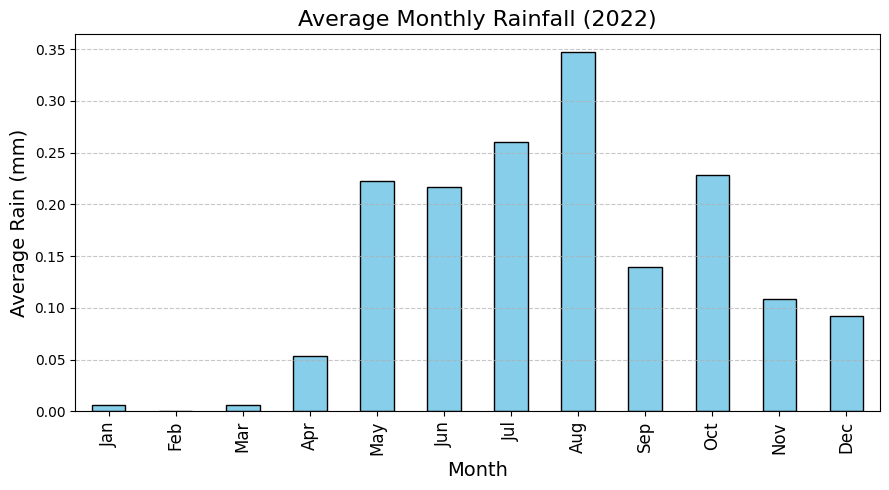

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the weather data CSV file
data_file = "weather_data_all_locations.csv"
df = pd.read_csv(data_file)

# Convert the date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Extract the month from the date and group by it
df['month'] = df['date'].dt.month
monthly_avg_rain = df.groupby('month')['rain'].mean()

# Plot the average monthly rain data
plt.figure(figsize=(9, 5))
monthly_avg_rain.plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title
plt.title("Average Monthly Rainfall (2022)", fontsize=16)
plt.xlabel("Month", fontsize=14)
plt.ylabel("Average Rain (mm)", fontsize=14)
plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()
